In [71]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import EMNIST
import timm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms

In [33]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("crawford/emnist")

# print("Path to dataset files:", path)

In [32]:
path = 'C:\\Users\\scanu\\.cache\\kagglehub\\datasets\\crawford\\emnist\\versions\\3'

dataset_file_train = "/emnist-letters-train.csv"
dataset_file_test = "/emnist-letters-test.csv"

train = pd.read_csv(path + dataset_file_train, delimiter=',')
test = pd.read_csv(path + dataset_file_test, delimiter=',')

In [34]:
y_train = np.array(train.iloc[:,0].values)
x_train = np.array(train.iloc[:,1:].values)

y_test = np.array(test.iloc[:,0].values)
x_test = np.array(test.iloc[:,1:].values)

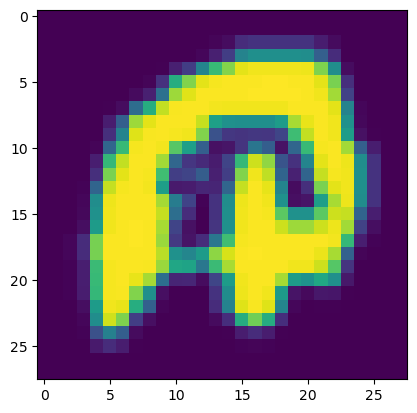

In [35]:
plt.imshow(x1[0].reshape(28,28))

In [36]:
# # Trasformazioni per le immagini
# transform = transforms.Compose([
#     transforms.Resize((28, 28)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.5], std=[0.5])
# ])


# dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [65]:
# Modello Transformer
class TextRecognitionModel(nn.Module):
    def __init__(self, num_classes=27):  # 26 lettere + background
        super(TextRecognitionModel, self).__init__()
        self.backbone = timm.create_model("vit_base_patch16_224", pretrained=True)
        self.backbone.head = nn.Identity()  # Rimuoviamo la testa di classificazione
        
        self.decoder = nn.TransformerDecoder(
            nn.TransformerDecoderLayer(d_model=768, nhead=8), num_layers=6
        )
        self.fc = nn.Linear(768, num_classes)
        
    def forward(self, x):
        features = self.backbone(x)
        features = features.unsqueeze(0)  # Adatta la dimensione per il decoder
        decoded = self.decoder(features, features)
        output = self.fc(decoded.squeeze(0))
        return output

# Istanziamento del modello
model = TextRecognitionModel(num_classes=27)

In [93]:
print(x_train[0:3].reshape(3,28,28).shape)
rgb_batch = np.repeat(x_train[0:3].reshape(3,28,28), 3, axis = 0).reshape(3,3,28,28)
print(rgb_batch.shape)

(3, 28, 28)
(3, 3, 28, 28)


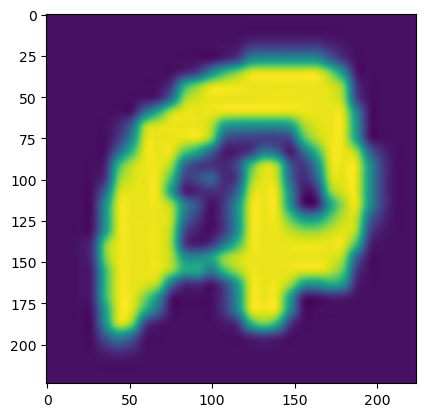

In [96]:
resizer = transforms.Resize((224,224),interpolation=transforms.InterpolationMode.BICUBIC)
resized_train = resizer(torch.Tensor(rgb_batch))
plt.imshow(resized_train[0][0])

In [138]:
# Definizione della funzione di perdita e ottimizzatore
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Addestramento del modello
epochs = 5
for epoch in range(epochs):
    for images, labels in zip(resized_train, y_train[0:3]):
        images = images.unsqueeze(0)
        labels = torch.Tensor([labels]).long()
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

print("Addestramento completato!")

Epoch [1/5], Loss: 8.2038
Epoch [2/5], Loss: 4.3521
Epoch [3/5], Loss: 0.8972
Epoch [4/5], Loss: 0.3400
Epoch [5/5], Loss: 1.0900
Addestramento completato!


In [139]:
out = model(resized_train).detach().numpy()

In [140]:
for i in range(3):
    print(np.argmax(out[i]))
    print(y_train[i])

7
7
7
16
7
15
